### This script can be used to test the models we have trained personally.

In [1]:
import pyaudio
import time
import wave
from scipy.io import wavfile
import librosa
import numpy as np
from matplotlib import pyplot as plt
import wbnn
import sys

This function records an audio of one second of duration. 

In [2]:
def record_1_sec():
    p = pyaudio.PyAudio()
    stream = p.open(format = pyaudio.paInt16,
                    channels = 1,
                    rate = 16000,
                    input = True,
                    output= True,
                    frames_per_buffer = 1024)
    print("recording...")
    time.sleep(0.1)
    frames = []
    init = time.time()
    for i in range(int(16000/1024)+4):
        data = stream.read(1024)
        frames.append(data)
    print("recoded!")
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    wavfile = wave.open("myrecording.wav", 'wb')
    wavfile.setnchannels(1)
    wavfile.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wavfile.setframerate(16000)
    wavfile.writeframes(b''.join(frames))
    wavfile.close()

# Convert the audio to spectogram
def spectogram(audio_file_name):
    sample_rate, samples = wavfile.read(audio_file_name) # load the data
    samples = (samples+65536)/2/65536 - 0.5
    spectogram = librosa.feature.melspectrogram(y=samples, sr=int(sample_rate))
    return np.log(spectogram+0.00001)

def show_spectogram(inp):
    plt.imshow(inp, origin="lower", aspect="auto", cmap="jet", interpolation="none")
    plt.colorbar()
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.xticks([])
    plt.yticks([])
    plt.show()

Record yourself, convert the audio to spectogram and see what the net has predicted!

Speak in 3...
Speak in 2...
Speak in 1...
recording...
recoded!


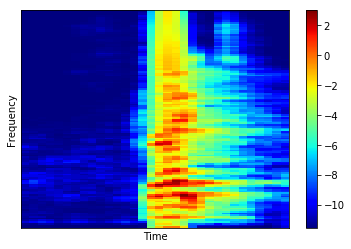

Confidence levels:
	 up 0.5347052260390673
	 down 0.001598598373292034
	 right 0.4460989064985918
	 left 0.017597269089048864

Prediction
	 UP


In [3]:
print("Speak in 3...")
time.sleep(1)
print("Speak in 2...")
time.sleep(1)
print("Speak in 1...")
time.sleep(1)
record_1_sec()

inp = spectogram("myrecording.wav")[:,-32:]

show_spectogram(inp)

inp = inp.T.flatten()[np.newaxis,:]

nn = wbnn.NN.load("models/SimpleASR_conv/")
predicted = nn.prop([[inp]])[0][0]

words = ["up", "down", "right", "left"]

print("Confidence levels:")
[ print("\t",*x) for x in list(zip(words,predicted[0,:].tolist()))]
print()
print("Prediction")
print("\t",words[np.argmax(predicted)].upper())